In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing clean dataset for task 1
pd.set_option('max_column', None)
db = pd.read_csv('../data/task1_data.csv', na_values=['?', None])
db.head(2)

,Bearer Id,Dur. (ms),MSISDN/Number,HTTP DL (Bytes),HTTP UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,1823652.0,3.366496e+10,NaN,NaN,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,1365104.0,3.368185e+10,NaN,NaN,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [18]:
pd.set_option('max_column', None)
db2 = pd.read_csv('../data/task1_2_data.csv', na_values=['?', None])
db2.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"


In [3]:
# Task 1.1 Obtaining session duration,the total download (DL) and upload (UL) data and
# the total data volume (in Bytes) during this session for each application
def obtain_sum_total(df, column_names):
    sum_total = df.groupby(column_names).sum()
    return sum_total
    
db_sum = obtain_sum_total(db, ['MSISDN/Number','Bearer Id'])


In [4]:
db_sum.drop(columns=['Other DL (Bytes)','Other UL (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)'], inplace = True)

In [5]:
db.groupby(['MSISDN/Number']).agg({'Bearer Id':'count'}).reset_index().sort_values(by='Bearer Id')

,MSISDN/Number,Bearer Id
0,3.360100e+10,1
65606,3.366740e+10,1
65605,3.366740e+10,1
65604,3.366740e+10,1
65601,3.366740e+10,1
...,...,...
76077,3.367588e+10,15
36909,3.365973e+10,16
13123,3.362578e+10,17
6404,3.361489e+10,17


In [6]:
db_sum.describe()

,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.470280e+05,1.470280e+05,147028.000000,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05
mean,1.061404e+05,1.813190e+06,33253.035007,5.809590e+06,2.076963e+06,1.809797e+06,4.721021e+05,1.175082e+07,1.111923e+07,1.174412e+07,1.111250e+07,4.263070e+08,8.372931e+06,4.153273e+07,4.592345e+08
std,9.158682e+04,1.074713e+06,19700.407509,3.434277e+06,1.232244e+06,1.073007e+06,2.801749e+05,6.953894e+06,6.559621e+06,6.960843e+06,6.580161e+06,2.526203e+08,4.942916e+06,1.274668e+07,2.539864e+08
min,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000e+00,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,2.866892e+06,7.114041e+06
25%,5.833400e+04,9.043430e+05,16532.000000,2.902564e+06,1.031521e+06,8.982768e+05,2.348310e+05,5.863920e+06,5.560914e+06,5.813578e+06,5.512114e+06,2.120815e+08,4.164863e+06,3.328640e+07,2.446731e+08
50%,8.639900e+04,1.802802e+06,33101.500000,5.799160e+06,2.065417e+06,1.803864e+06,4.686085e+05,1.168343e+07,1.107899e+07,1.171126e+07,1.106988e+07,4.259874e+08,8.341428e+06,4.125154e+07,4.583512e+08
75%,1.329998e+05,2.708800e+06,49587.500000,8.665474e+06,3.102922e+06,2.702198e+06,7.041785e+05,1.753174e+07,1.659915e+07,1.756587e+07,1.658973e+07,6.366657e+08,1.249695e+07,4.923846e+07,6.692333e+08
max,5.659733e+06,2.140952e+07,381924.000000,5.614408e+07,1.955117e+07,1.736216e+07,5.363196e+06,1.173038e+08,1.227704e+08,1.206419e+08,1.149237e+08,5.085494e+09,9.477161e+07,4.128648e+08,5.396236e+09


In [34]:
def format_float(value):
    return f'{value:,.2f}'
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.distplot(a=df[column], kde=True, color=color)
    plt.title(f'Distribution of {column}', size=30, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(15, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

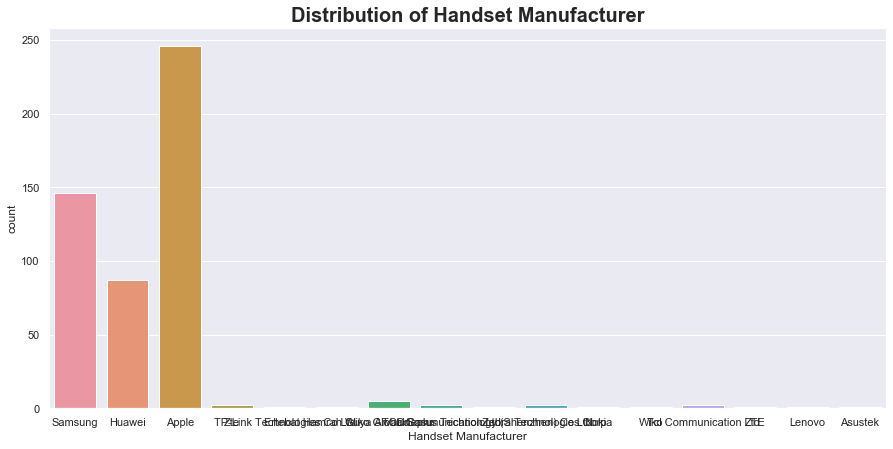

In [35]:
plot_count(db2.head(500), 'Handset Manufacturer')

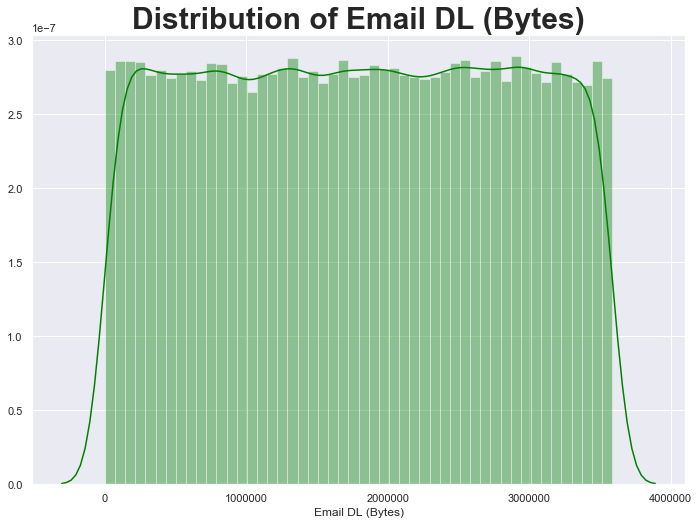

In [9]:
plot_hist(db, "Email DL (Bytes)", "green")

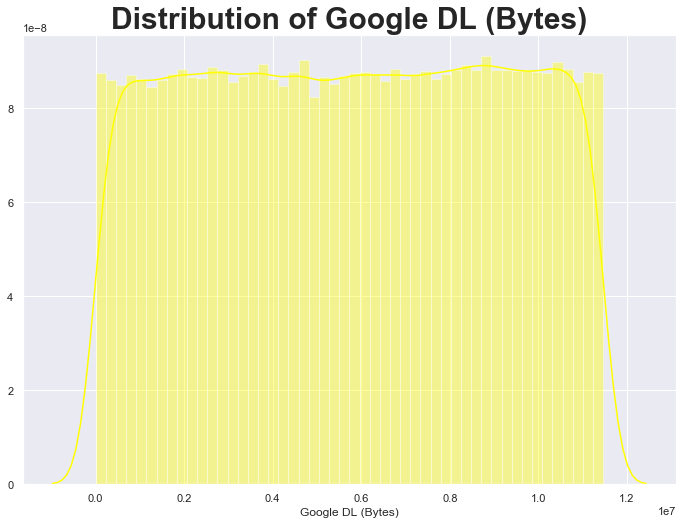

In [10]:
plot_hist(db, "Google DL (Bytes)", "yellow")

In [11]:
sns.distplot?

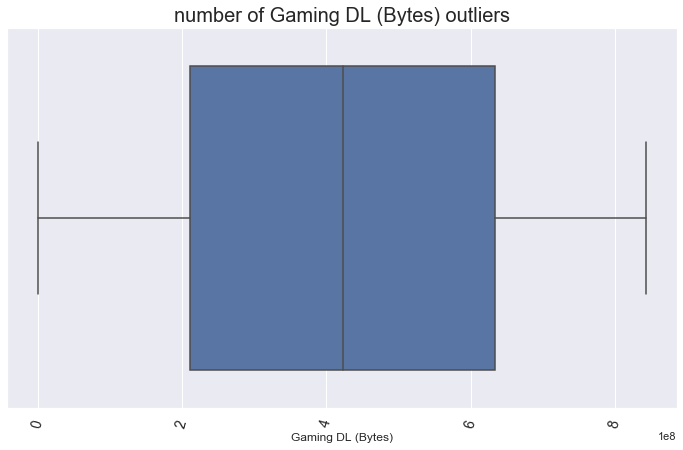

In [14]:
plot_box(db, "Gaming DL (Bytes)", "number of Gaming DL (Bytes) outliers")

Multi variate analysis

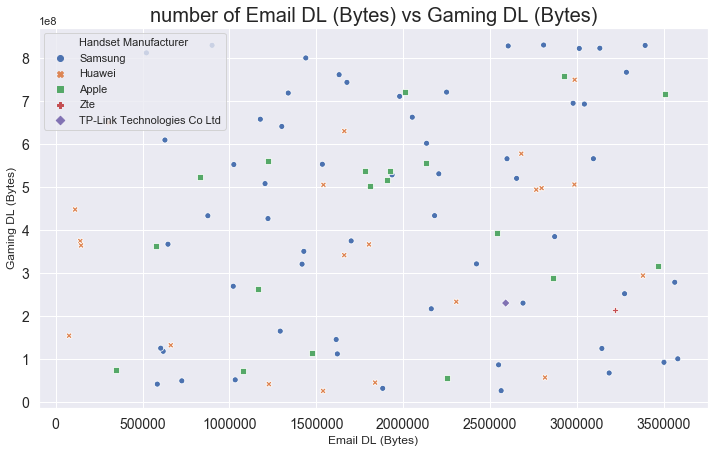

In [20]:
plot_scatter(db2.head(100), x_col="Email DL (Bytes)", y_col="Gaming DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="number of Email DL (Bytes) vs Gaming DL (Bytes)")

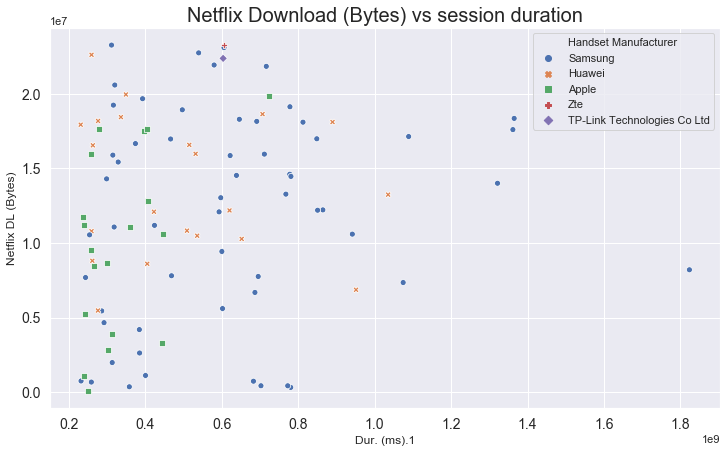

In [28]:
plot_scatter(db2.head(100), x_col="Dur. (ms).1", y_col="Netflix DL (Bytes)", hue="Handset Manufacturer",
             style="Handset Manufacturer", title="Netflix Download (Bytes) vs session duration")